<a href="https://colab.research.google.com/github/jafetimbre/verbose-projects/blob/master/infosec/mininet-dos-sim/analize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

![DoS attack simulation diagram](https://raw.githubusercontent.com/jafetimbre/verbose-projects/master/infosec/mininet-dos-sim/simulation_diagram.png "DoS attack simulation diagram")

For more information, check out the simulation code [here](https://github.com/jafetimbre/verbose-projects/blob/master/infosec/mininet-dos-sim/simulation.py)

We are analyzing the traffic after the ping request-reply phase (usual traffic + dos).

In [2]:
host_1 = pd.read_csv("https://raw.githubusercontent.com/jafetimbre/verbose-projects/master/infosec/mininet-dos-sim/data/h1-eth0.csv")
# host_2 = pd.read_csv("https://raw.githubusercontent.com/jafetimbre/verbose-projects/master/infosec/mininet-dos-sim/data/h2-eth0.csv")
# host_3 = pd.read_csv("https://raw.githubusercontent.com/jafetimbre/verbose-projects/master/infosec/mininet-dos-sim/data/h3-eth0.csv")

In [3]:
host_1

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,10.0.0.2,10.0.0.1,TCP,7306,"60410 > 5001 [PSH, ACK] Seq=1 Ack=1 Win=83 L..."
1,2,0.000040,10.0.0.1,10.0.0.2,TCP,66,5001 > 60410 [ACK] Seq=1 Ack=7241 Win=78 Len...
2,3,0.066453,10.0.0.2,10.0.0.1,TCP,10202,"60410 > 5001 [PSH, ACK] Seq=7241 Ack=1 Win=8..."
3,4,0.066478,10.0.0.1,10.0.0.2,TCP,66,5001 > 60410 [ACK] Seq=1 Ack=17377 Win=75 Le...
4,5,0.145256,10.0.0.2,10.0.0.1,TCP,4410,"60410 > 5001 [PSH, ACK] Seq=17377 Ack=1 Win=..."
...,...,...,...,...,...,...,...
37751,37752,49.151673,10.0.0.2,10.0.0.1,TCP,2962,"60410 > 5001 [PSH, ACK] Seq=4238297 Ack=1 Wi..."
37752,37753,49.151703,10.0.0.1,10.0.0.2,TCP,66,5001 > 60410 [ACK] Seq=1 Ack=4241193 Win=82 ...
37753,37754,49.176859,10.0.0.2,10.0.0.1,TCP,1514,60410 > 5001 [ACK] Seq=4241193 Ack=1 Win=83 ...
37754,37755,49.188067,10.0.0.2,10.0.0.1,TCP,2962,"60410 > 5001 [PSH, ACK] Seq=4242641 Ack=1 Wi..."


In [4]:
host_1.Destination.unique()

array(['10.0.0.1', '10.0.0.2', 'ff02::2', 'ff02::fb', '10.0.0.3'],
      dtype=object)

In [5]:
host_1 = host_1.set_index(pd.DatetimeIndex(pd.to_datetime(host_1["Time"], unit="s")))


In [6]:
freq = host_1.resample('1S').count()["Time"]
freq

Time
1970-01-01 00:00:00      79
1970-01-01 00:00:01      84
1970-01-01 00:00:02      82
1970-01-01 00:00:03      84
1970-01-01 00:00:04      82
1970-01-01 00:00:05      83
1970-01-01 00:00:06      82
1970-01-01 00:00:07      81
1970-01-01 00:00:08      84
1970-01-01 00:00:09      83
1970-01-01 00:00:10    1668
1970-01-01 00:00:11    1749
1970-01-01 00:00:12    1787
1970-01-01 00:00:13    1725
1970-01-01 00:00:14    1725
1970-01-01 00:00:15    1769
1970-01-01 00:00:16    1772
1970-01-01 00:00:17    1802
1970-01-01 00:00:18    1772
1970-01-01 00:00:19    1776
1970-01-01 00:00:20    1738
1970-01-01 00:00:21    1729
1970-01-01 00:00:22    1756
1970-01-01 00:00:23    1782
1970-01-01 00:00:24    1744
1970-01-01 00:00:25    1805
1970-01-01 00:00:26    1772
1970-01-01 00:00:27    1740
1970-01-01 00:00:28    1720
1970-01-01 00:00:29    1773
1970-01-01 00:00:30     323
1970-01-01 00:00:31      82
1970-01-01 00:00:32      83
1970-01-01 00:00:33      84
1970-01-01 00:00:34      81
1970-01-01 00:0

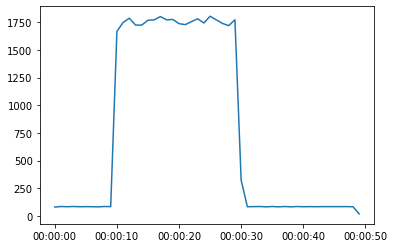

In [7]:
plt.plot(freq)